# Coursera IBM Machine Learning - Unsupervised Learning - Final Project

In [18]:
import polars as pl
import polars.selectors as ps

rs = 42

I have chosen the [Kaggle Spotify Audio Features dataset](https://www.kaggle.com/datasets/tomigelo/spotify-audio-features) for my final project.

## Data Description

- 17 features
    - 'artist_name' -> String
    - 'track_id' -> String
    - 'track_name' -> String
    - 'acousticness' -> Float
    - 'danceability' -> Float
    - 'duration_ms' -> Int
    - 'energy' -> Float
    - 'instrumentalness' -> Float
    - 'key' -> Int
    - 'liveness' -> Float
    - 'loudness' -> Float
    - 'mode' -> Int
    - 'speechiness' -> Float
    - 'tempo' -> Float
    - 'time_signature' -> Int
    - 'valence' -> Float
    - 'popularity' -> Int
- 130663 rows

In this analysis we'll restrict ourselves to the actual audio feature columns (acousticness, danceability, energy, instrumentalness, liveness, speechiness, valence), leaving 8 features to consider.

First we will investigate how much these features cover the variance of the data by performing PCA. It might be that some features are redundant or capture similar properties. 

Then we use a gaussian mixture model to investigate which clusters are present in the data.

Finally hierarchical clustering is used to find out the process of clustering.

In [ ]:
data_original = pl.read_csv("./data/SpotifyAudioFeaturesApril2019.csv")
data_original.head()

shape: (5, 17)
┌────────────┬────────────┬────────────┬───────────┬───┬─────────┬───────────┬─────────┬───────────┐
│ artist_nam ┆ track_id   ┆ track_name ┆ acousticn ┆ … ┆ tempo   ┆ time_sign ┆ valence ┆ popularit │
│ e          ┆ ---        ┆ ---        ┆ ess       ┆   ┆ ---     ┆ ature     ┆ ---     ┆ y         │
│ ---        ┆ str        ┆ str        ┆ ---       ┆   ┆ f64     ┆ ---       ┆ f64     ┆ ---       │
│ str        ┆            ┆            ┆ f64       ┆   ┆         ┆ i64       ┆         ┆ i64       │
╞════════════╪════════════╪════════════╪═══════════╪═══╪═════════╪═══════════╪═════════╪═══════════╡
│ YG         ┆ 2RM4jf1Xa9 ┆ Big Bank   ┆ 0.00582   ┆ … ┆ 203.927 ┆ 4         ┆ 0.118   ┆ 15        │
│            ┆ zPgMGRDiht ┆ feat. 2    ┆           ┆   ┆         ┆           ┆         ┆           │
│            ┆ 8O         ┆ Chainz,    ┆           ┆   ┆         ┆           ┆         ┆           │
│            ┆            ┆ Big S…     ┆           ┆   ┆         ┆           ┆         ┆           │
│ YG         ┆ 1tHDG53xJN ┆ BAND DRUM  ┆ 0.0244    ┆ … ┆ 159.009 ┆ 4         ┆ 0.371   ┆ 0         │
│            ┆ GsItRA3vfV ┆ (feat.     ┆           ┆   ┆         ┆           ┆         ┆           │
│            ┆ gs         ┆ A$AP       ┆           ┆   ┆         ┆           ┆         ┆           │
│            ┆            ┆ Rocky)     ┆           ┆   ┆         ┆           ┆         ┆           │
│ R3HAB      ┆ 6Wosx2euFP ┆ Radio      ┆ 0.025     ┆ … ┆ 114.966 ┆ 4         ┆ 0.382   ┆ 56        │
│            ┆ MT14UXiWud ┆ Silence    ┆           ┆   ┆         ┆           ┆         ┆           │
│            ┆ My         ┆            ┆           ┆   ┆         ┆           ┆         ┆           │
│ Chris Cooq ┆ 3J2Jpw61sO ┆ Lactose    ┆ 0.0294    ┆ … ┆ 123.003 ┆ 4         ┆ 0.641   ┆ 0         │
│            ┆ 7l6Hc7qdYV ┆            ┆           ┆   ┆         ┆           ┆         ┆           │
│            ┆ 91         ┆            ┆           ┆   ┆         ┆           ┆         ┆           │
│ Chris Cooq ┆ 2jbYvQCyPg ┆ Same -     ┆ 0.0000352 ┆ … ┆ 120.047 ┆ 4         ┆ 0.928   ┆ 0         │
│            ┆ X3CdmAzeVe ┆ Original   ┆           ┆   ┆         ┆           ┆         ┆           │
│            ┆ uS         ┆ mix        ┆           ┆   ┆         ┆           ┆         ┆           │
└────────────┴────────────┴────────────┴───────────┴───┴─────────┴───────────┴─────────┴───────────┘

## EDA and Preprocessing

First, we check if there are any null or nan values/

In [ ]:
data_original.null_count()

shape: (1, 17)
┌─────────────┬──────────┬────────────┬────────────┬───┬───────┬────────────┬─────────┬────────────┐
│ artist_name ┆ track_id ┆ track_name ┆ acousticne ┆ … ┆ tempo ┆ time_signa ┆ valence ┆ popularity │
│ ---         ┆ ---      ┆ ---        ┆ ss         ┆   ┆ ---   ┆ ture       ┆ ---     ┆ ---        │
│ u32         ┆ u32      ┆ u32        ┆ ---        ┆   ┆ u32   ┆ ---        ┆ u32     ┆ u32        │
│             ┆          ┆            ┆ u32        ┆   ┆       ┆ u32        ┆         ┆            │
╞═════════════╪══════════╪════════════╪════════════╪═══╪═══════╪════════════╪═════════╪════════════╡
│ 0           ┆ 0        ┆ 0          ┆ 0          ┆ … ┆ 0     ┆ 0          ┆ 0       ┆ 0          │
└─────────────┴──────────┴────────────┴────────────┴───┴───────┴────────────┴─────────┴────────────┘

Below we extract the floating point columns (except 'tempo' and 'loudness') and describe the distribution. Most values are already between 0 and 1 (or extremely close). But since distance based scaling methods can be sensitive to scale, we'll first make sure the scale is uniform.

In [105]:
features = data_original.select(ps.float()).drop(["loudness", "tempo"])
features.describe()

shape: (9, 8)
┌────────────┬─────────────┬────────────┬──────────┬────────────┬──────────┬────────────┬──────────┐
│ statistic  ┆ acousticnes ┆ danceabili ┆ energy   ┆ instrument ┆ liveness ┆ speechines ┆ valence  │
│ ---        ┆ s           ┆ ty         ┆ ---      ┆ alness     ┆ ---      ┆ s          ┆ ---      │
│ str        ┆ ---         ┆ ---        ┆ f64      ┆ ---        ┆ f64      ┆ ---        ┆ f64      │
│            ┆ f64         ┆ f64        ┆          ┆ f64        ┆          ┆ f64        ┆          │
╞════════════╪═════════════╪════════════╪══════════╪════════════╪══════════╪════════════╪══════════╡
│ count      ┆ 130663.0    ┆ 130663.0   ┆ 130663.0 ┆ 130663.0   ┆ 130663.0 ┆ 130663.0   ┆ 130663.0 │
│ null_count ┆ 0.0         ┆ 0.0        ┆ 0.0      ┆ 0.0        ┆ 0.0      ┆ 0.0        ┆ 0.0      │
│ mean       ┆ 0.3425      ┆ 0.581468   ┆ 0.569196 ┆ 0.224018   ┆ 0.194886 ┆ 0.112015   ┆ 0.43963  │
│ std        ┆ 0.345641    ┆ 0.190077   ┆ 0.260312 ┆ 0.360328   ┆ 0.167733 ┆ 0.124327   ┆ 0.259079 │
│ min        ┆ 0.0         ┆ 0.0        ┆ 0.0      ┆ 0.0        ┆ 0.0      ┆ 0.0        ┆ 0.0      │
│ 25%        ┆ 0.0316      ┆ 0.459      ┆ 0.396    ┆ 0.0        ┆ 0.0975   ┆ 0.0389     ┆ 0.224    │
│ 50%        ┆ 0.203       ┆ 0.605      ┆ 0.603    ┆ 0.000149   ┆ 0.124    ┆ 0.0559     ┆ 0.42     │
│ 75%        ┆ 0.636       ┆ 0.727      ┆ 0.775    ┆ 0.44       ┆ 0.236    ┆ 0.129      ┆ 0.638    │
│ max        ┆ 0.996       ┆ 0.996      ┆ 1.0      ┆ 1.0        ┆ 0.999    ┆ 0.966      ┆ 1.0      │
└────────────┴─────────────┴────────────┴──────────┴────────────┴──────────┴────────────┴──────────┘

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
mms = MinMaxScaler()
features = pl.DataFrame(mms.fit_transform(features), schema=features.columns)
features.describe()

shape: (9, 8)
┌────────────┬─────────────┬────────────┬──────────┬────────────┬──────────┬────────────┬──────────┐
│ statistic  ┆ acousticnes ┆ danceabili ┆ energy   ┆ instrument ┆ liveness ┆ speechines ┆ valence  │
│ ---        ┆ s           ┆ ty         ┆ ---      ┆ alness     ┆ ---      ┆ s          ┆ ---      │
│ str        ┆ ---         ┆ ---        ┆ f64      ┆ ---        ┆ f64      ┆ ---        ┆ f64      │
│            ┆ f64         ┆ f64        ┆          ┆ f64        ┆          ┆ f64        ┆          │
╞════════════╪═════════════╪════════════╪══════════╪════════════╪══════════╪════════════╪══════════╡
│ count      ┆ 130663.0    ┆ 130663.0   ┆ 130663.0 ┆ 130663.0   ┆ 130663.0 ┆ 130663.0   ┆ 130663.0 │
│ null_count ┆ 0.0         ┆ 0.0        ┆ 0.0      ┆ 0.0        ┆ 0.0      ┆ 0.0        ┆ 0.0      │
│ mean       ┆ 0.343876    ┆ 0.583804   ┆ 0.569196 ┆ 0.224018   ┆ 0.195081 ┆ 0.115958   ┆ 0.43963  │
│ std        ┆ 0.347029    ┆ 0.19084    ┆ 0.260312 ┆ 0.360328   ┆ 0.167901 ┆ 0.128703   ┆ 0.259079 │
│ min        ┆ 0.0         ┆ 0.0        ┆ 0.0      ┆ 0.0        ┆ 0.0      ┆ 0.0        ┆ 0.0      │
│ 25%        ┆ 0.031727    ┆ 0.460843   ┆ 0.396    ┆ 0.0        ┆ 0.097598 ┆ 0.040269   ┆ 0.224    │
│ 50%        ┆ 0.203815    ┆ 0.60743    ┆ 0.603    ┆ 0.000149   ┆ 0.124124 ┆ 0.057867   ┆ 0.42     │
│ 75%        ┆ 0.638554    ┆ 0.72992    ┆ 0.775    ┆ 0.44       ┆ 0.236236 ┆ 0.13354    ┆ 0.638    │
│ max        ┆ 1.0         ┆ 1.0        ┆ 1.0      ┆ 1.0        ┆ 1.0      ┆ 1.0        ┆ 1.0      │
└────────────┴─────────────┴────────────┴──────────┴────────────┴──────────┴────────────┴──────────┘

Let's first explore correlations in the data by making a pairplot and a correlation matrix. The pariplot shows no clear correlations between the data, but from the correlation matrix we can see some correlated features.

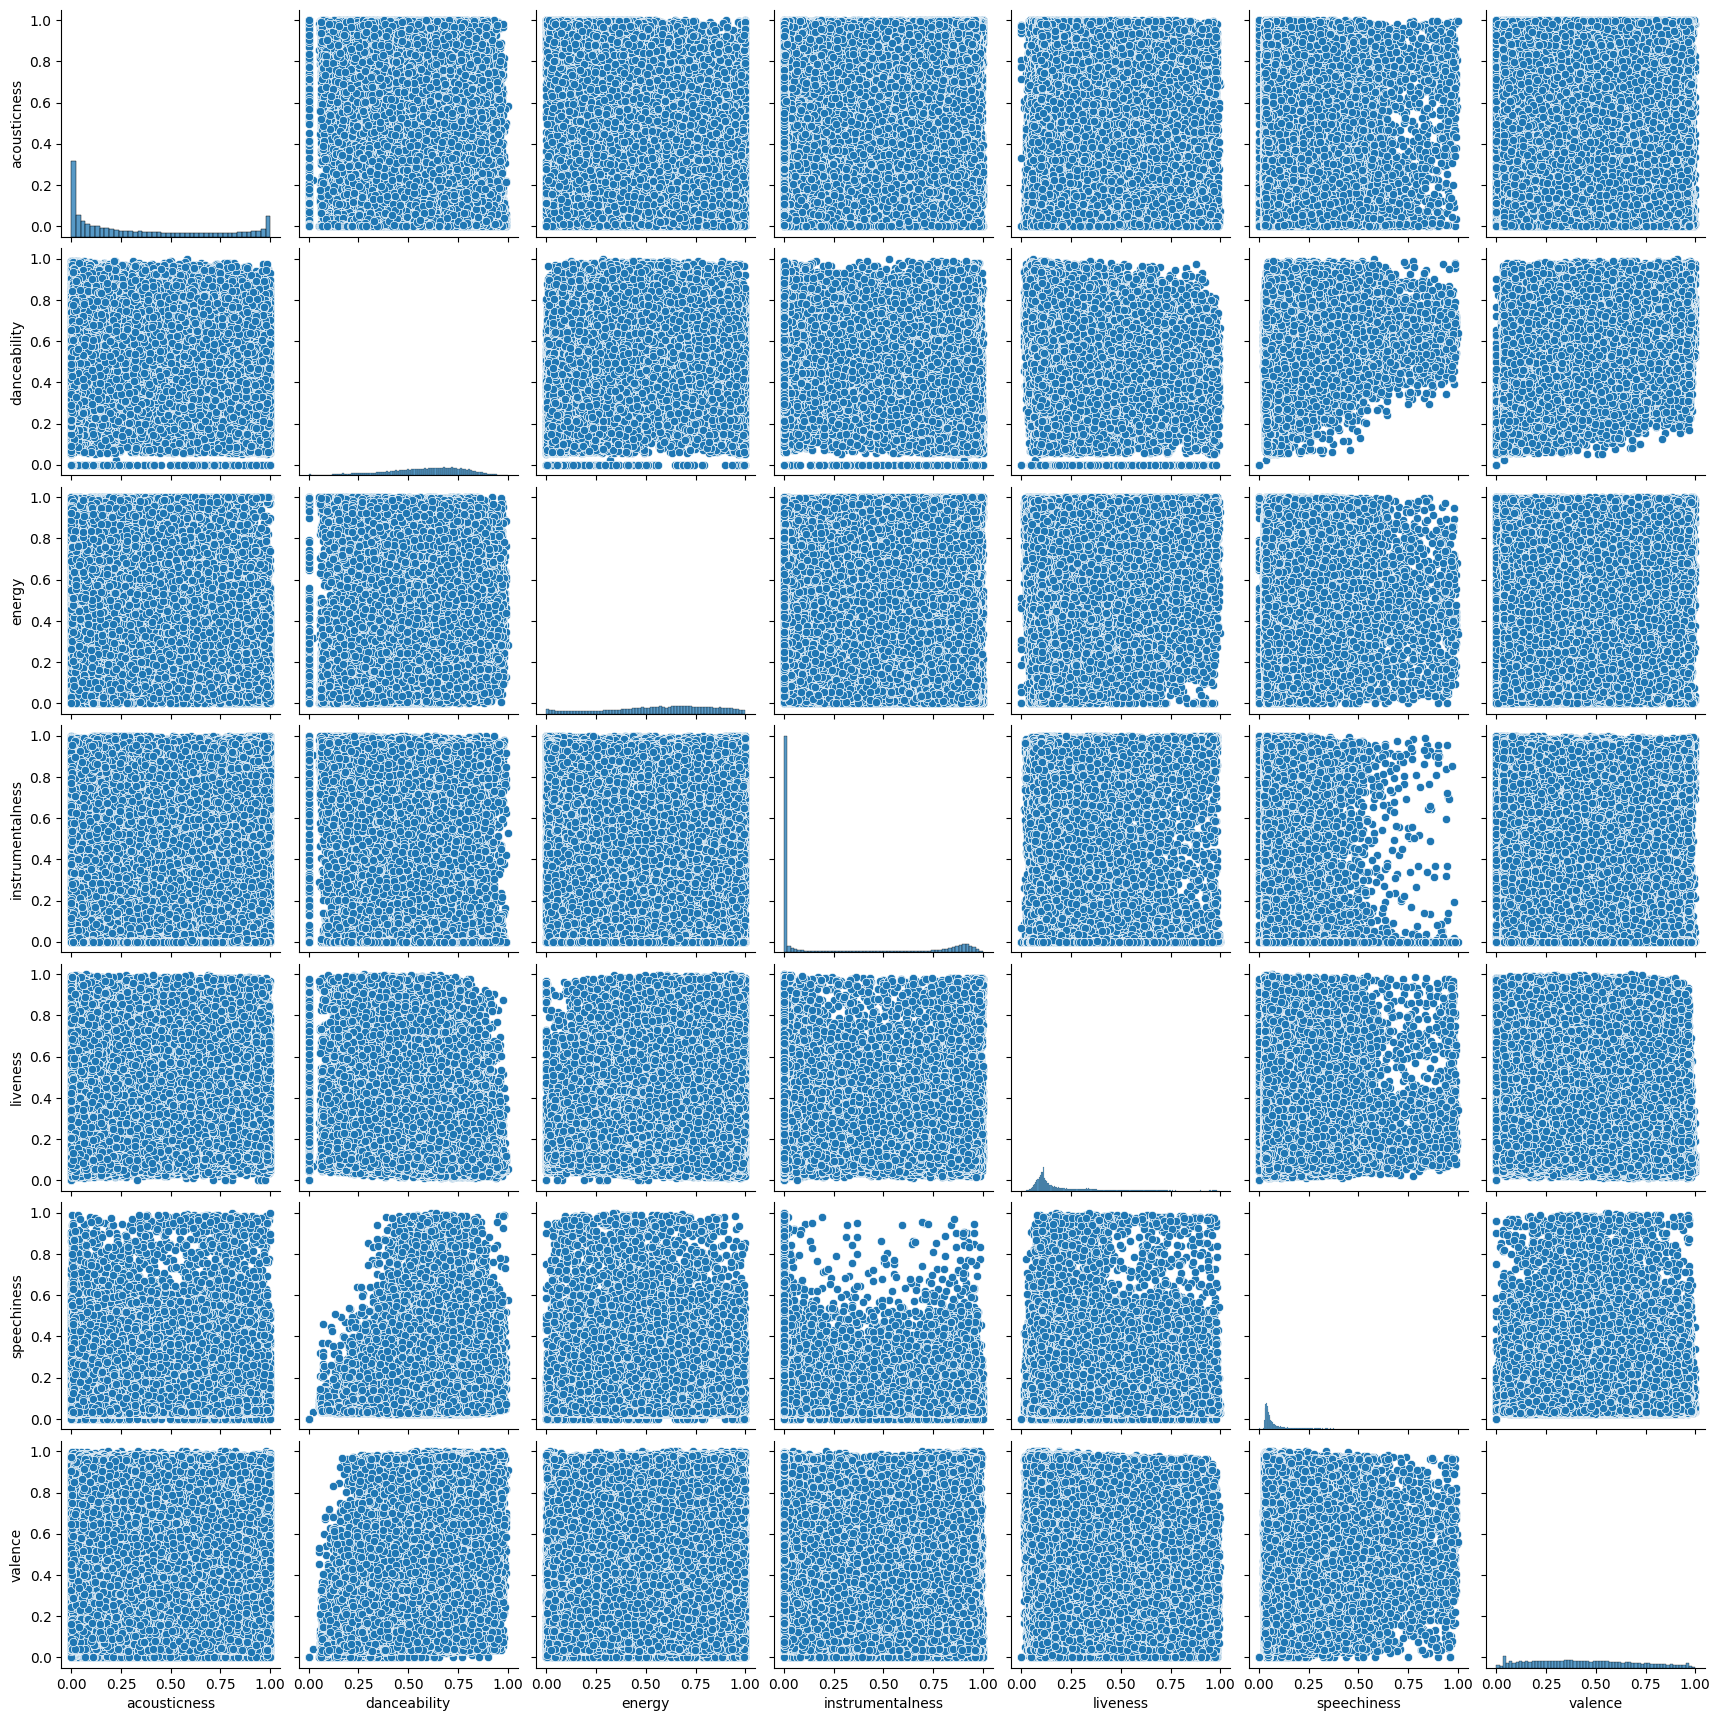

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(features.to_pandas())
plt.show()

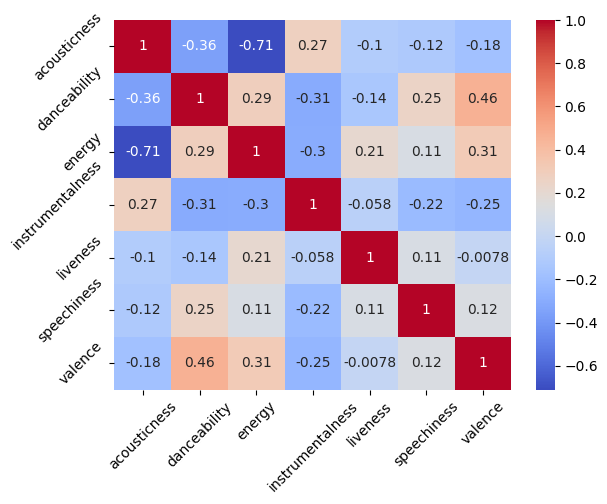

In [9]:
ax = sns.heatmap(
    features.corr(), 
    cmap="coolwarm", 
    annot=True, 
    xticklabels=features.columns, 
    yticklabels=features.columns)
ax.tick_params(labelrotation=45)

There is a strong negative correlation between Energy and Acousticness. Also danceability, energy and valence seem to have some form of correlation. It is likely that PCA will be able to reduce the dimensionality of this dataset.

In [19]:
from sklearn.decomposition import PCA
import numpy as np

threshold = 0.95

pca = PCA(random_state=rs).fit(features)
f"For a variance threshold above {threshold*100:.2f}%, we need to keep {np.searchsorted(np.cumsum(pca.explained_variance_ratio_), threshold) + 1} components"

'For a variance threshold above 95.00%, we need to keep 6 components'

So we can remove a single component from the dataset without sacrificing more than 5% variance. This is not a very strong result, but we can at least see if there are more insightful clusters formed by reducing the dimensionality.

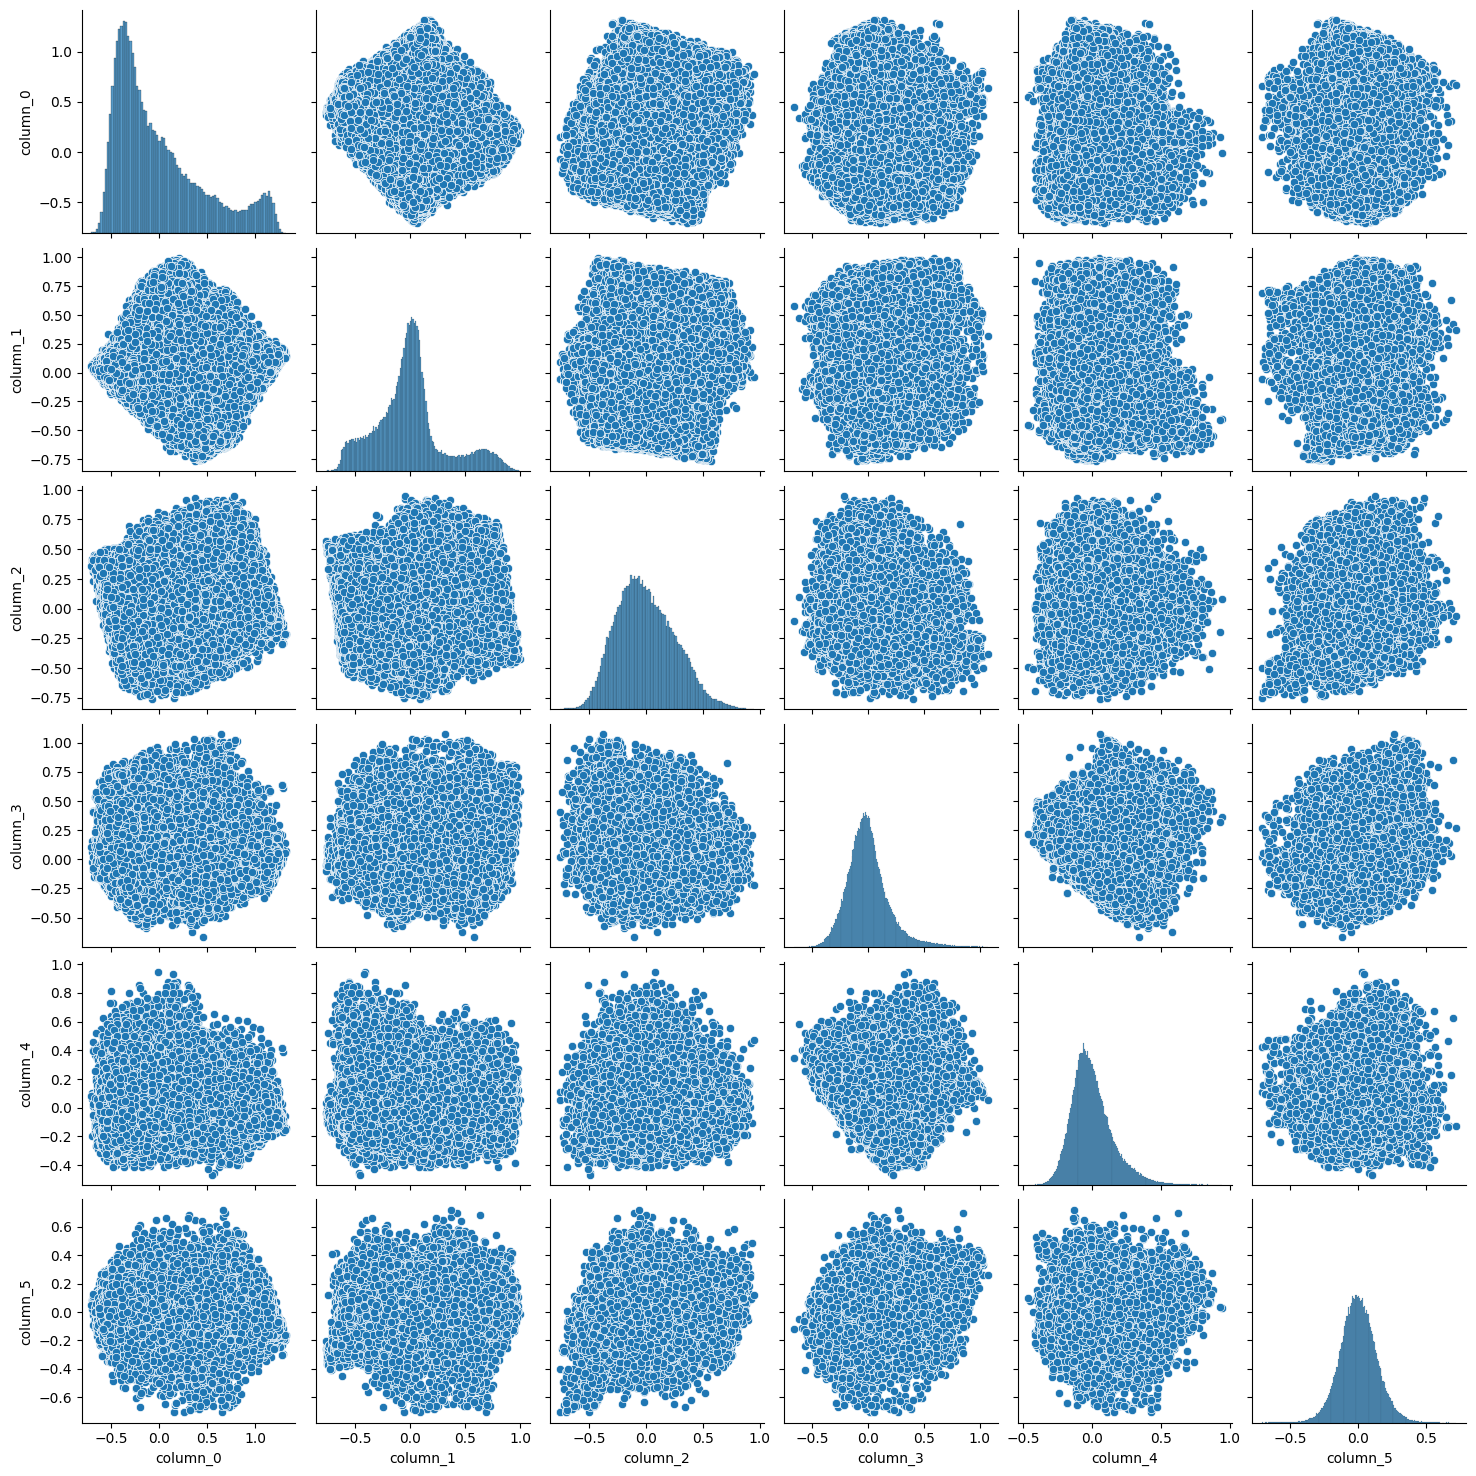

In [87]:
pca = PCA(n_components=6, random_state=rs).fit(features)
features_reduced = pca.transform(features)

sns.pairplot(pl.DataFrame(features_reduced).to_pandas())
plt.show()

From this we can see that there is no clear clustering visible in this dataset. This is likely due to the fact that different types of music often span large ranges of values for music features and as such will overlap in the feature space. A soft clustering method like GMM might be able to reveal latent groupings (indirectly observable clusters) by allowing probabilistic cluster membership.

### Gaussian Mixtures for more insight

We'll use the previously obtained dimensionality reduced features as input for the Gaussian Mixture model. This clustering method will fit a preselected amount of Gaussians to the data and attempt to assign cluster membership probabilities to each datapoint. Because there is no apparent best choice for the number of components, we'll use model selection for GMM provided by sklearn.

This works by using grid search with a GMM model and providing the following parameters:
- n_components
- covariance_type
- scoring = gmm_bic_score

Where the scoring method is the "Bayesian Information Criterion" (BIC), which is defined as $\text{BIC } = k \ln(n) - 2 \ln(\hat{L})$, where $k$ is the number of parameters in the model, $n$ is the number of data points and $\hat{L}$ is the miximized value of the likelihood function of the model. The goal of this scoring criterion is to avoid overfitting by keeping the number of parameters low. This is similar to using regularization in regression models, but with the number of parameters instead of the size of the parameters.

Before fitting the model though, we need to standardise the dataset to impropve model accuracy. We'll do this by applying `sklearn.preprocessing.StandardScaler`.

In [27]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the bic score as the negative value of the estimator BIC value
gmm_bic_score = lambda estimator, X: -estimator.named_steps['gmm'].bic(estimator.named_steps['scaler'].transform(X))

param_grid = {
    "gmm__n_components": range(4, 10),
    "gmm__covariance_type": ["spherical", "tied", "diag", "full"]
}

pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("gmm", GaussianMixture())
    ]
)

gm_gs = GridSearchCV(
    pipe, 
    param_grid=param_grid, 
    scoring=gmm_bic_score,
    verbose=3
)
gm_gs.fit(features_reduced)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END gmm__covariance_type=spherical, gmm__n_components=4;, score=-417479.460 total time=   0.8s
[CV 2/5] END gmm__covariance_type=spherical, gmm__n_components=4;, score=-430024.285 total time=   0.8s
[CV 3/5] END gmm__covariance_type=spherical, gmm__n_components=4;, score=-440523.603 total time=   0.7s
[CV 4/5] END gmm__covariance_type=spherical, gmm__n_components=4;, score=-429656.443 total time=   1.1s
[CV 5/5] END gmm__covariance_type=spherical, gmm__n_components=4;, score=-415722.294 total time=   0.5s
[CV 1/5] END gmm__covariance_type=spherical, gmm__n_components=5;, score=-415550.448 total time=   0.7s
[CV 2/5] END gmm__covariance_type=spherical, gmm__n_components=5;, score=-424194.299 total time=   1.0s
[CV 3/5] END gmm__covariance_type=spherical, gmm__n_components=5;, score=-436285.823 total time=   1.7s
[CV 4/5] END gmm__covariance_type=spherical, gmm__n_components=5;, score=-429487.701 total time=   1.1s
[C

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gmm', GaussianMixture())]),
             param_grid={'gmm__covariance_type': ['spherical', 'tied', 'diag',
                                                  'full'],
                         'gmm__n_components': range(4, 10)},
             scoring=<function <lambda> at 0x00000159D1517420>, verbose=3)

Using a full variance setting (this correponds to a complete covariance matrix representation), we see that there are 9 components found. Though

We can easily investgate the results by plotting them into a category plot

In [32]:
import pandas as pd

df = pd.DataFrame(gm_gs.cv_results_)[
    ["param_gmm__n_components", "param_gmm__covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_gmm__n_components": "Number of components",
        "param_gmm__covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

Number of components Type of covariance      BIC score
23                     9               full  252913.760226
22                     8               full  257801.118535
21                     7               full  262689.086332
20                     6               full  270918.279847
19                     5               full  283986.004838

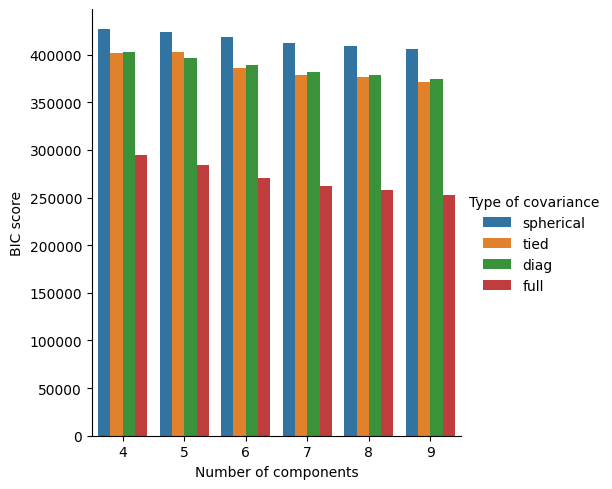

In [33]:
import seaborn as sns

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

There is no clear indication how many components would be best, but we can redo the gridsearch at a full covariance matrix representation (as it is clear this method works best overall), but with a greater amount of components. By using the BIC criterion there should be a minimum somewhere as we add more components.

In [34]:
param_grid = {
    "gmm__n_components": range(4, 25)
}

pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("gmm", GaussianMixture(covariance_type="full"))
    ]
)

gm_gs = GridSearchCV(
    pipe, 
    param_grid=param_grid, 
    scoring=gmm_bic_score,
    verbose=3
)
gm_gs.fit(features_reduced)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5] END .........gmm__n_components=4;, score=-280494.821 total time=   3.0s
[CV 2/5] END .........gmm__n_components=4;, score=-305808.679 total time=   2.8s
[CV 3/5] END .........gmm__n_components=4;, score=-313569.649 total time=   1.8s
[CV 4/5] END .........gmm__n_components=4;, score=-298714.066 total time=   4.7s
[CV 5/5] END .........gmm__n_components=4;, score=-270916.459 total time=   3.1s
[CV 1/5] END .........gmm__n_components=5;, score=-283489.989 total time=   3.1s
[CV 2/5] END .........gmm__n_components=5;, score=-298470.387 total time=   2.8s
[CV 3/5] END .........gmm__n_components=5;, score=-302706.648 total time=   3.5s
[CV 4/5] END .........gmm__n_components=5;, score=-280431.887 total time=   3.5s
[CV 5/5] END .........gmm__n_components=5;, score=-264831.661 total time=   3.9s
[CV 1/5] END .........gmm__n_components=6;, score=-256506.755 total time=   6.2s
[CV 2/5] END .........gmm__n_components=6;, sco

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('gmm', GaussianMixture())]),
             param_grid={'gmm__n_components': range(4, 25)},
             scoring=<function <lambda> at 0x00000159D1517420>, verbose=3)

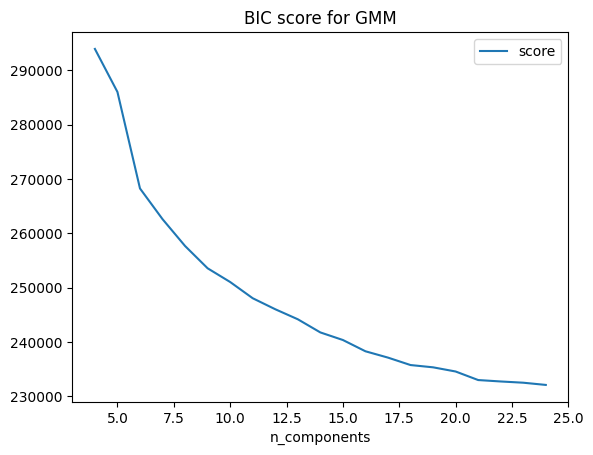

In [48]:
results = pd.DataFrame(gm_gs.cv_results_)[["param_gmm__n_components", "mean_test_score"]]
results = results.rename(columns={"param_gmm__n_components":"n_components", "mean_test_score":"score"})
results["score"] = -results["score"]
results.plot.line("n_components", "score", title="BIC score for GMM");

The absence of a clear BIC minimum shows that there is no inherent clustering in this dataset. With increasing number of components the BIC score *does* decrease, meaning that at least some form of grouping is being captured. From this we can conclude that the musical features as defined by spotify are not good predictors of musical genre as classically defined. However, we can try to see if another set of musical archetypes naturally appears from the analysis.

### GMM model as archetype description

A descriptive clustering with 10 components (as this is where the fit seems to start stabilising) is described below.

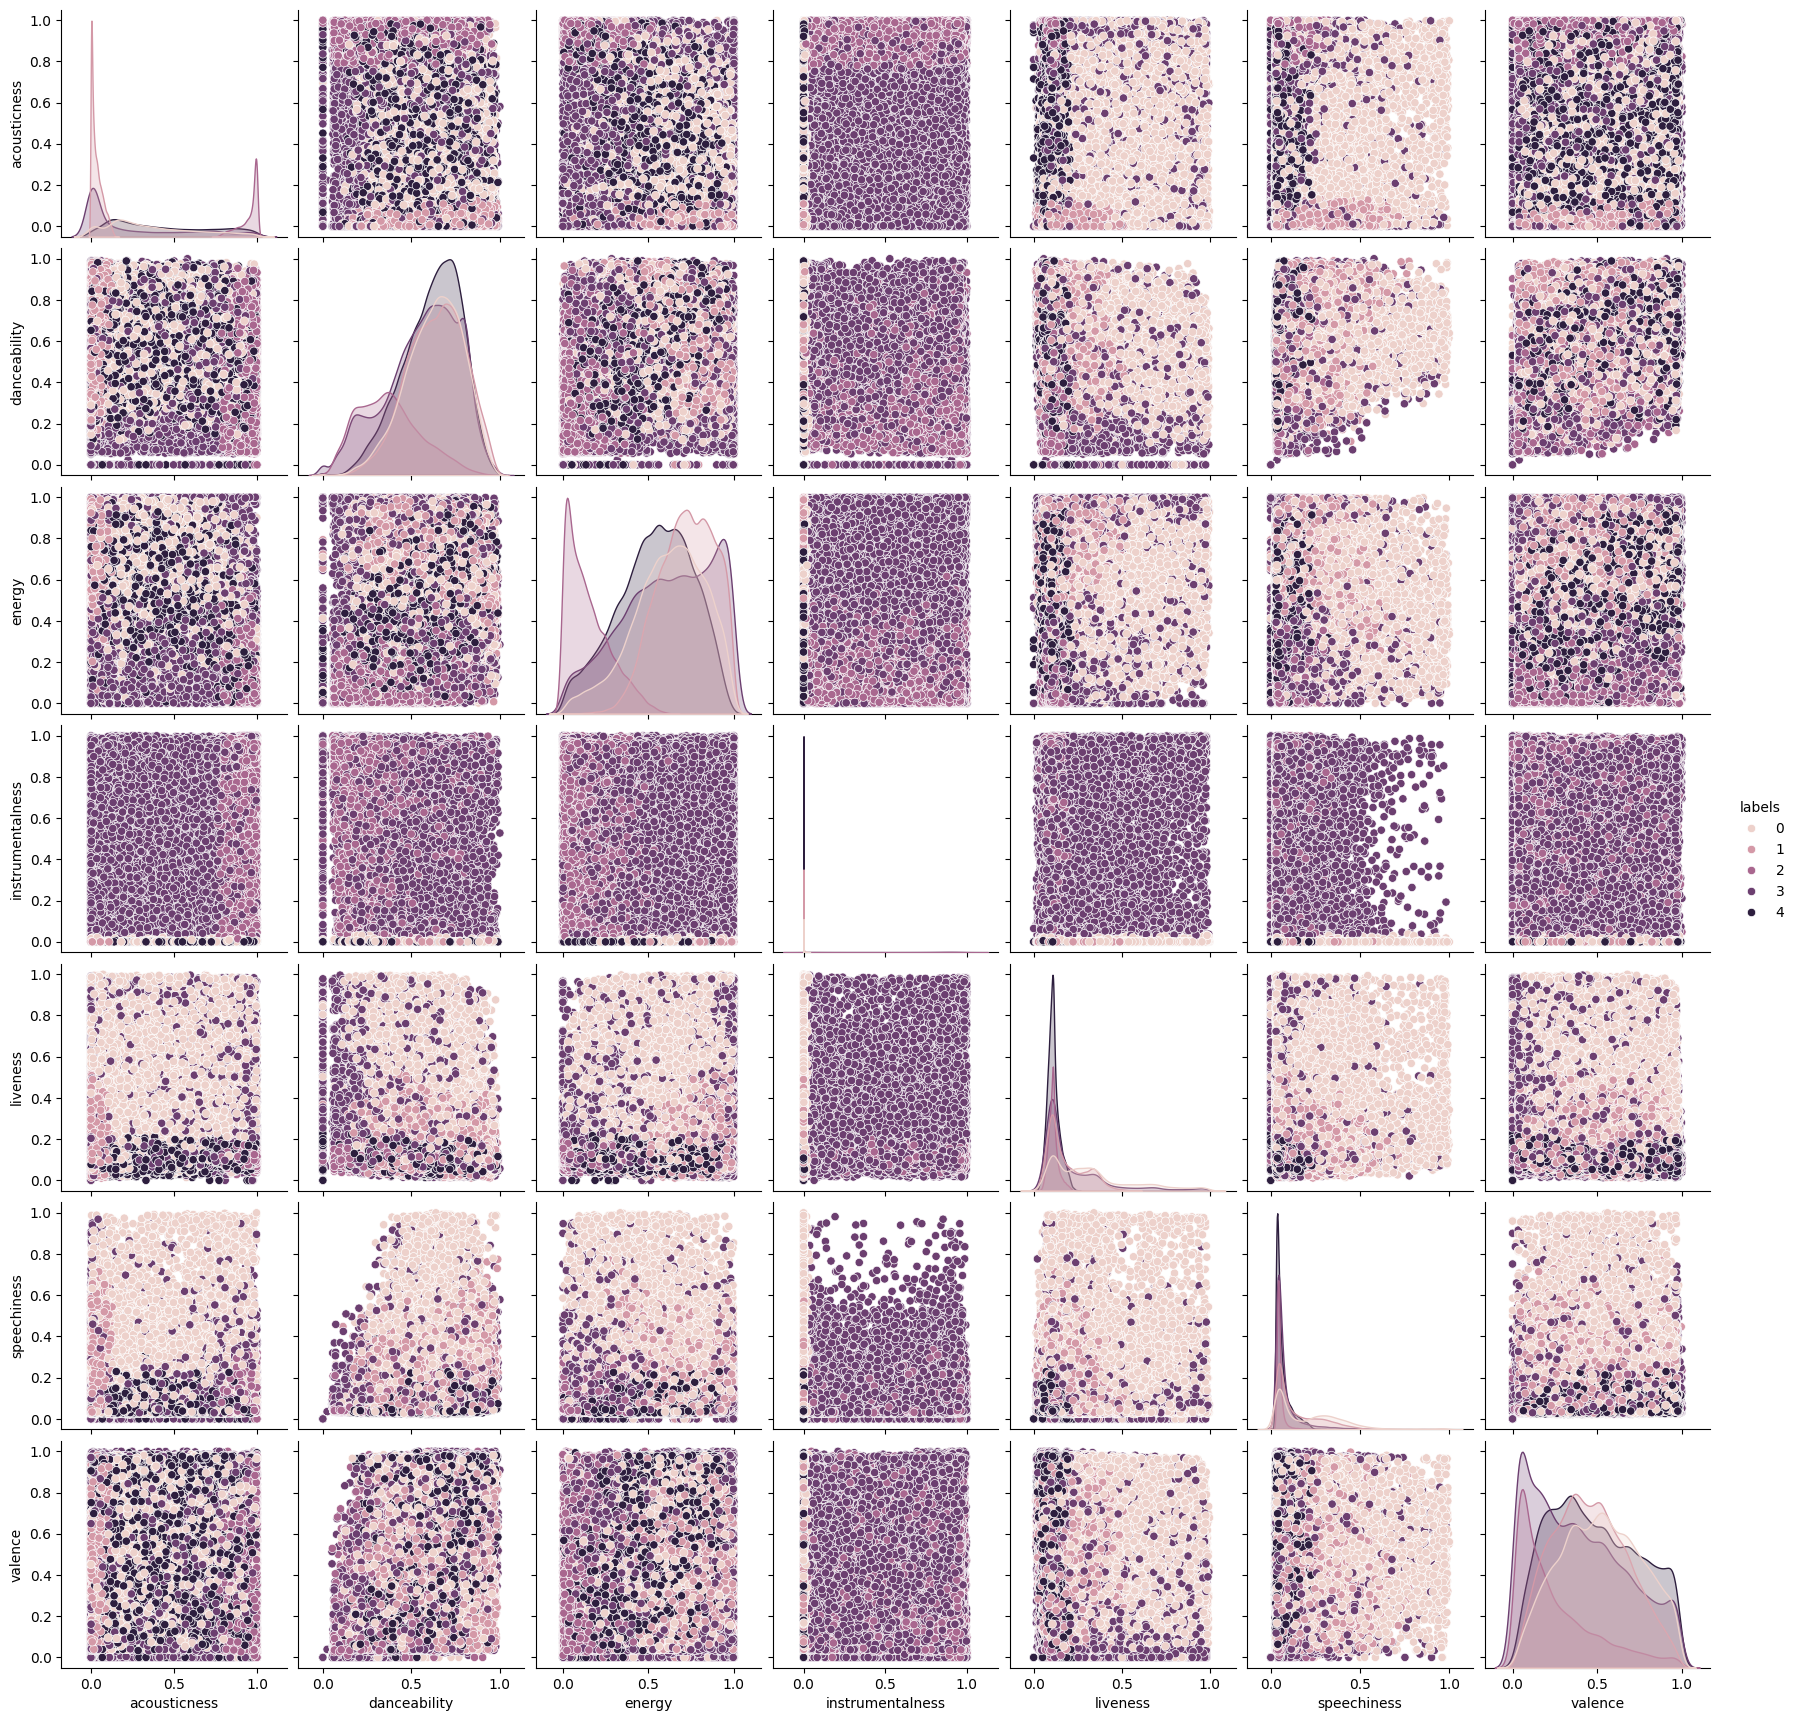

In [69]:
gmm_archetypes = GaussianMixture(n_components=5, covariance_type="full").fit(features_reduced)

labels = gmm_archetypes.predict(features_reduced)

features_gmm_clustered = pl.concat(
    [
        pl.DataFrame(features), 
        pl.DataFrame(labels, schema=["labels"])
    ], 
    how='horizontal')

sns.pairplot(features_gmm_clustered.to_pandas(), hue="labels")
plt.show()

From this we can see that no clear structure emerges from the clustering. Though there are visible groupings and correlations, from this it would be very hard to generalise or form a definitive conclusion.

For more insight we can transform the found means back to original spotify audio feature space using the PCA from before. Then we can interpret each cluster as an archetype of music, instead of specific genres.

<Axes: >

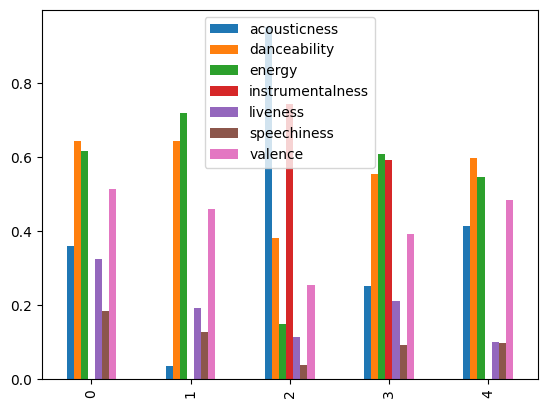

In [95]:
gmm_means = gmm_archetypes.means_
feature_means = pca.inverse_transform(gmm_means)

pd.DataFrame(feature_means, columns=features.columns).plot.bar()

If we inspect the cluster means and interpret their position as how much of each component is representative for each cluster, then some interesting patterns start to emerge.

- 3 of the clusters include almost no instrumentalness
- Most clusters have moderate danceability and energy and are of similar magnitude in most clusters. This also confirms the earlier found correlation between these variables.
- Speechiness is low in most clusters. This is an artifact of the original data not having many high speechiness datapoints.
- The same argument can be amde for liveness.

How we can interpret the clusters is:

0. Moderate acousticness with high danceability, valence and energy. Likely to contain upbeat pop music, 
1. High energy and low liveness. Polished studio music, probably energetic studio produced tracks. 
2. Very high acousticness and Instrumentalness. Orchestral music or ambient instrumental music.
3. Relatively balanced, but with high instrumentalness, likely contains electronic music.
4. Similar to cluster 0, but with a bit more acousticness and lower liveness. Possibly singer songwriters.

We can take 10 random samples from each group to see if any more patterns emerge. Unfortunately the original dataset did not include genre information so no correlation can be made there.

In [ ]:
grouped_samples = (
    data_original
    .hstack(pl.DataFrame(labels, schema=["label"]))
    .select(["artist_name", "track_name", "label"])
    .group_by(["label", "artist_name"])
    .agg(pl.len().alias("count"))
    .sort(["label", "count"], descending=[False, True])
    .group_by("label")
    .head(3)
)
grouped_samples

shape: (15, 3)
┌───────┬─────────────────────────┬───────┐
│ label ┆ artist_name             ┆ count │
│ ---   ┆ ---                     ┆ ---   │
│ i64   ┆ str                     ┆ u32   │
╞═══════╪═════════════════════════╪═══════╡
│ 0     ┆ Armin van Buuren        ┆ 703   │
│ 0     ┆ Wolfgang Amadeus Mozart ┆ 400   │
│ 0     ┆ Johann Sebastian Bach   ┆ 331   │
│ 1     ┆ Armin van Buuren        ┆ 265   │
│ 1     ┆ Waka Flocka Flame       ┆ 160   │
│ …     ┆ …                       ┆ …     │
│ 3     ┆ Image Sounds            ┆ 286   │
│ 3     ┆ Wolfgang Amadeus Mozart ┆ 231   │
│ 4     ┆ Johann Sebastian Bach   ┆ 625   │
│ 4     ┆ Los Cadetes De Linares  ┆ 207   │
│ 4     ┆ Wolfgang Amadeus Mozart ┆ 199   │
└───────┴─────────────────────────┴───────┘

In [ ]:
(
    data_original
    .group_by("artist_name")
    .agg(pl.len())
    .sort("len", descending=True)
    .head(10)
)

shape: (10, 2)
┌─────────────────────────┬──────┐
│ artist_name             ┆ len  │
│ ---                     ┆ ---  │
│ str                     ┆ u32  │
╞═════════════════════════╪══════╡
│ Johann Sebastian Bach   ┆ 3621 │
│ Wolfgang Amadeus Mozart ┆ 1755 │
│ Armin van Buuren        ┆ 1124 │
│ Ludwig van Beethoven    ┆ 928  │
│ Frédéric Chopin         ┆ 614  │
│ Claude Debussy          ┆ 451  │
│ Image Sounds            ┆ 369  │
│ Waka Flocka Flame       ┆ 273  │
│ Los Cadetes De Linares  ┆ 266  │
│ Antonio Vivaldi         ┆ 254  │
└─────────────────────────┴──────┘